## Artificial Intelligence Assignment 2
## No6. Neural Network 3
## 20132651 Sungjae Lee

In [1]:
import torch

In [2]:
class MyReLU(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x):
        ctx.save_for_backward(x)
        return x.clamp(min = 0)
    
    @staticmethod
    def backward(ctx, grad_y):
        x, = ctx.saved_tensors
        grad_input = grad_y.clone()
        grad_input[x < 0] = 0
        return grad_input
    
# ReLU 함수를 클래스로 만들어 forward 와 backward 두 가지로 정의합니다

In [3]:
def my_relu(x):
    return MyReLU.apply(x)

# ReLU 함수를 호출하는 my_relu 함수를 정의합니다

In [4]:
N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in, dtype = torch.float)
y = torch.randn(N, D_out, dtype = torch.float)
w1 = torch.randn(D_in, H, dtype = torch.float, requires_grad=True)
w2 = torch.randn(H, D_out, dtype = torch.float, requires_grad=True)

# 위의 코드와 동일하게 설정합니다

In [6]:
learning_rate = 10e-6
loss_list = []

# 여전히 learning_rate 를 10e - 6 으로 설정하고 진행합니다

In [7]:
for t in range(500):
    y_pred = my_relu(x.mm(w1)).mm(w2)
    loss = (y_pred - y).pow(2).sum()

    print(t, loss.item())
    loss_list.append(loss.item())
    
    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        w1.grad.zero_()
        w2.grad.zero_()

0 30257112.0
1 3427540224.0
2 17689678446592.0
3 1.322847838159239e+25
4 inf
5 nan
6 nan
7 nan
8 nan
9 nan
10 nan
11 nan
12 nan
13 nan
14 nan
15 nan
16 nan
17 nan
18 nan
19 nan
20 nan
21 nan
22 nan
23 nan
24 nan
25 nan
26 nan
27 nan
28 nan
29 nan
30 nan
31 nan
32 nan
33 nan
34 nan
35 nan
36 nan
37 nan
38 nan
39 nan
40 nan
41 nan
42 nan
43 nan
44 nan
45 nan
46 nan
47 nan
48 nan
49 nan
50 nan
51 nan
52 nan
53 nan
54 nan
55 nan
56 nan
57 nan
58 nan
59 nan
60 nan
61 nan
62 nan
63 nan
64 nan
65 nan
66 nan
67 nan
68 nan
69 nan
70 nan
71 nan
72 nan
73 nan
74 nan
75 nan
76 nan
77 nan
78 nan
79 nan
80 nan
81 nan
82 nan
83 nan
84 nan
85 nan
86 nan
87 nan
88 nan
89 nan
90 nan
91 nan
92 nan
93 nan
94 nan
95 nan
96 nan
97 nan
98 nan
99 nan
100 nan
101 nan
102 nan
103 nan
104 nan
105 nan
106 nan
107 nan
108 nan
109 nan
110 nan
111 nan
112 nan
113 nan
114 nan
115 nan
116 nan
117 nan
118 nan
119 nan
120 nan
121 nan
122 nan
123 nan
124 nan
125 nan
126 nan
127 nan
128 nan
129 nan
130 nan
131 nan
132 nan

### (1) y_pred에 따른 loss (accuracy) 변화를 화면 출력 확인 (plot)

In [8]:
import matplotlib.pyplot as plt

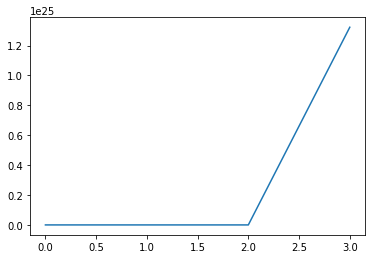

In [9]:
plt.plot(loss_list)
plt.show()

### (2) 앞 문제의 코드와 비교

In [10]:
# 전반적인 코드는 아까와 동일하며, 차이점은 ReLU 함수의 사용을 직접 정의한
# MyReLU 를 이용하였다는 점입니다. 그렇기 때문에 여전히 learning_rate 는 변하지 않았고
# 이에 loss 발산 문제 또한 해결되지 않았습니다.